In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [4]:
import pandas as pd #does help in handling modify data in form of csv,xlsx
import matplotlib.pyplot as plt,matplotlib.image as mpimg
from sklearn.model_selection import train_test_split #helps in split the datasets
from sklearn import svm
%matplotlib inline
#this helps in keeping the code inside this notebook

In [16]:
train=pd.read_csv("../input/digit-recognizer/train.csv")

In [8]:
print(train.shape)#prints dimension
train.head()#shows first 5

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# read test #same as above for importingtest dataframe
test= pd.read_csv("../input/digit-recognizer/test.csv")
print(test.shape)#dimensions
test.head()#top 5

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#put labels into y_train variable
Y_train=train["label"]#to pick the first column and use that to put in Y_Train
X_train=train.drop(labels=["label"],axis=1)#remove 'label' columns and fit everything else in data frame


In [22]:
Y_train.describe()#function used to find count ,mean standard deviation,minimum ,percentiles,max

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [23]:
X_train.info()#used to tell about file size no of entries,datatypes
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

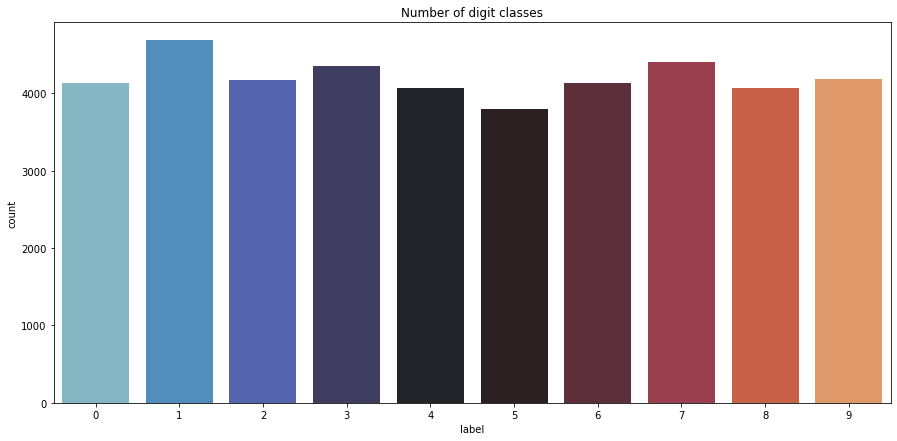

In [24]:
# visualize number of digits classes
plt.figure(figsize=(15,7))#probably defines the ratio
g = sns.countplot(Y_train, palette="icefire")#countplot to count the no of similiar values
plt.title("Number of digit classes")
Y_train.value_counts()

In [32]:
# Normalize the data #grayscale normalization #reduce effects of illumination differences
X_train = X_train / 255.0#to bring the data from 0 to 1
test = test / 255.0 #same as above
print("x_train shape: ",X_train.shape)#no of pics is 4200,no pixels for them  is 784
print("test shape: ",test.shape)#2800 pics 

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [31]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)#I think 28 is standard which after some work on it changes to 26*26
test = test.values.reshape(-1,28,28,1)#same as above
print("x_train shape: ",X_train.shape)#
print("test shape: ",test.shape)#

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [33]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding#which is better form to feed the data into ML algorithm
Y_train = to_categorical(Y_train, num_classes = 10)

Using TensorFlow backend.


In [34]:
# Split the train and the validation set for the fitting#to check our results
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)#test size is 10% and train size 90%
print("x_test shape",X_val.shape)#validation set
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)#y validation ser

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [40]:
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential# import sequential feature
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D#other tiny features important to imrove results
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))#import relu activation fucntion
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))#import softmax activation function

In [42]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [43]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [45]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 18s 120ms/step - loss: 2.3018 - accuracy: 0.1093 - val_loss: 2.3011 - val_accuracy: 0.1155
Epoch 2/10
151/151 [==============================] - 18s 119ms/step - loss: 2.3014 - accuracy: 0.1107 - val_loss: 2.3014 - val_accuracy: 0.1155
Epoch 3/10
151/151 [==============================] - 19s 123ms/step - loss: 2.3013 - accuracy: 0.1114 - val_loss: 2.3011 - val_accuracy: 0.1155
Epoch 4/10
151/151 [==============================] - 18s 119ms/step - loss: 2.3014 - accuracy: 0.1112 - val_loss: 2.3010 - val_accuracy: 0.1155
Epoch 5/10
151/151 [==============================] - 18s 119ms/step - loss: 2.3013 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1155
Epoch 6/10
151/151 [==============================] - 18s 122ms/step - loss: 2.3014 - accuracy: 0.1111 - val_loss: 2.3010 - val_accuracy: 0.1155
Epoch 7/10
151/151 [==============================] - 18s 118ms/step - loss: 2.3015 - accuracy: 0.1102 - val_loss: 2.3011 - val_ac

In [ ]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss incurred")
plt.xlabel("Number of Epochs used")
plt.ylabel("Loss")
plt.legend()
plt.show()